# JAERI model for oxygen penetration
This is the model described in 
1. T. Seguchi, S. Hashimoto, K. Arakawa, N. Hayakawa, W. Kawakami, and I. Kuriyama, Radiat. Phys. Chem. **17**, 195 (1981), 
2. T. Seguchi, S. Hashimoto, W. Kawakami, and I. Kuriyama, *Radiation damage of polymer materials, 1*, Tech. Rep. (Japan Atomic Energy Research Inst., 1977).

The model is described by the equation
\begin{equation}
    \frac{d^2y}{d\lambda^2}=Ay(\sqrt{y^2+\frac{B}{A}}-y)
\end{equation}
where $y\equiv\frac{C}{C_0}$, $\lambda\equiv\frac{x}{l}$, $A\equiv\frac{C_0k_2^2}{2Dk_1}$, $B\equiv\frac{2YR}{DC_0}$.

Begin with some imports

In [5]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplhep as hep

In [6]:
hep.style.use(hep.style.CMS)

Define the functions that give the ODE that describes oxygen diffusion:

In [7]:
# Parameters need to be defined as global variables
A = 10
B = 10


def func_rrate(y):
    y[y < 0] = 0
    return A * y * (np.sqrt(y**2 + B / A) - y)


def solver(x, y):
    y[0][y[0] < 0] = 0
    return np.vstack((y[1], A * y[0] * (np.sqrt(y[0] ** 2 + B / A) - y[0])))


def bc(ya, yb):
    return np.array([ya[0] - 1, yb[0] - 1])

Some plotting settings

In [8]:
# Set colormap
values = range(4)
cmap = plt.get_cmap("Set1")
cNorm = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# or just change default color cycle
N = 4
color_cycle = plt.cycler(color=plt.cm.cividis(np.linspace(0, 1, N)))
plt.rcParams["axes.prop_cycle"] = color_cycle

Solve the ODE as a boundary value problem and plot $y(\lambda)$ vs $\lambda$:

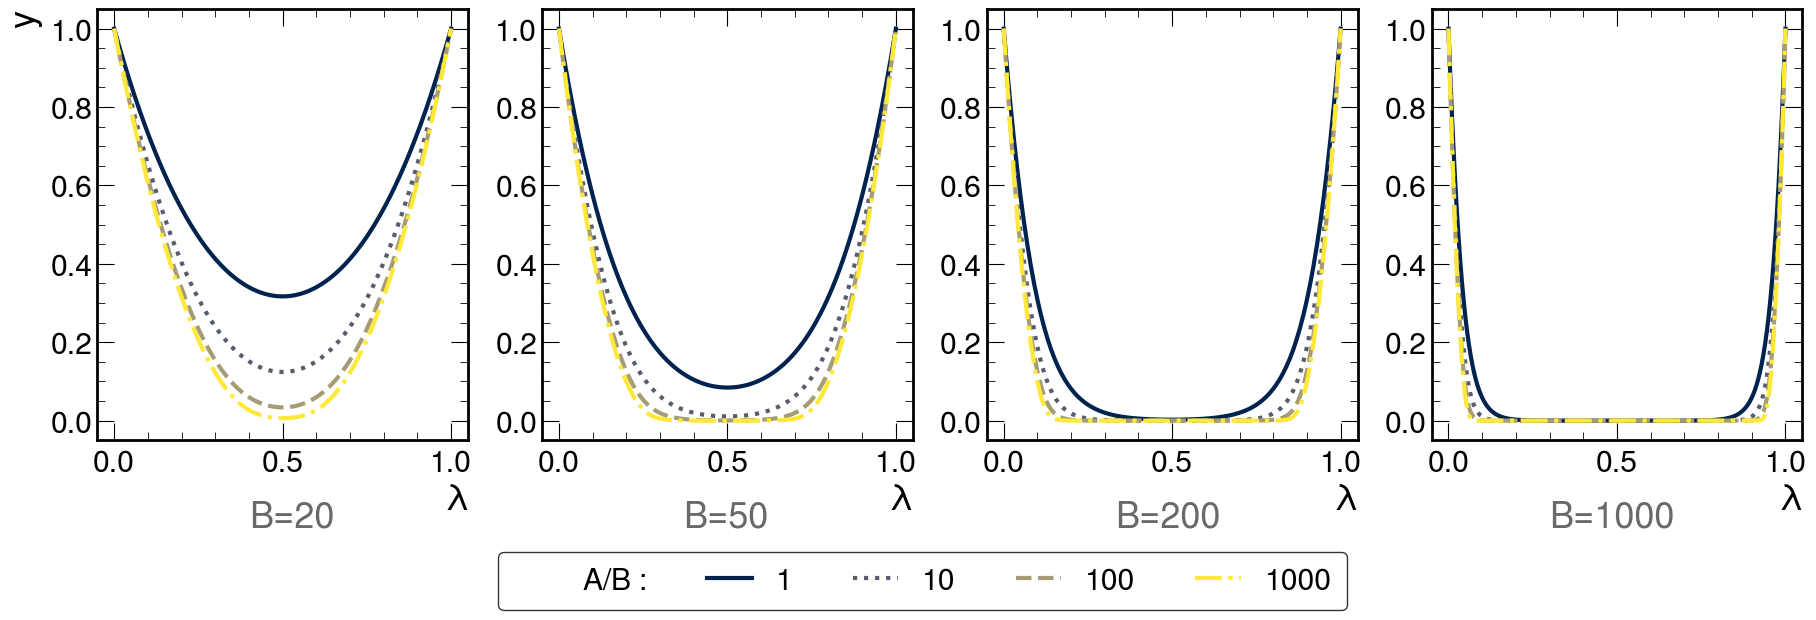

In [9]:
%matplotlib inline

# Scan values
beta = [20, 50, 200, 1000]
alphaOverBeta = [1, 10, 100, 1000]
alpha = [[b * a for a in alphaOverBeta] for b in beta]
beta_x_label = [0.4, 0.37, 0.33, 0.3]
plots = len(alpha) * [0]
linestyles = ["solid", "dotted", "dashed", "dashdot"]

fig, ax = plt.subplots(1, 4, figsize=(22, 7))
for fi, b in enumerate(beta):
    for ix, a in enumerate(alpha[fi]):
        A = a
        B = b
        x = np.linspace(0, 1, 50)
        y_a = np.zeros((2, x.size))
        y_a[0] = 1
        y_a[1] = 0
        asol = solve_bvp(solver, bc, x, y_a)
        x_plot = np.linspace(0, 1, 200)
        y_plot_a = asol.sol(x_plot)[0]
        ydot_plot_a = asol.sol(x_plot)[1]
        rrate = func_rrate(y_plot_a)
        (plots[ix],) = ax[fi].plot(
            x_plot,
            y_plot_a,
            label=f"A={A}",
            linestyle=linestyles[ix],
            lw=3,
        )
    ax[fi].text(beta_x_label[fi], -0.27, f"B={B}", color="dimgrey")
    box = ax[fi].get_position()
    ax[fi].set_position(
        [
            box.x0,
            box.y0 + box.height * 0.2,
            box.width,
            box.height * 0.8,
        ]
    )
    ax[fi].set_xlim([-0.05, 1.05])
    ax[fi].set_ylim([-0.05, 1.05])
    ax[fi].set_xlabel(r"$\lambda$")

ax[0].set_ylabel(r"$y$")
ph = [plt.plot([], marker="", ls="")[0]]
leg = fig.legend(
    ph + plots,
    [r"$A/B$ :"] + alphaOverBeta,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.0),
    ncols=len(alpha) + 1,
    frameon=True,
)
leg.get_frame().set_edgecolor("black")
fig.savefig("../plots/jaeri_oxygen_concentration.pdf", bbox_inches="tight")
plt.show()

Plot reactivity rate:

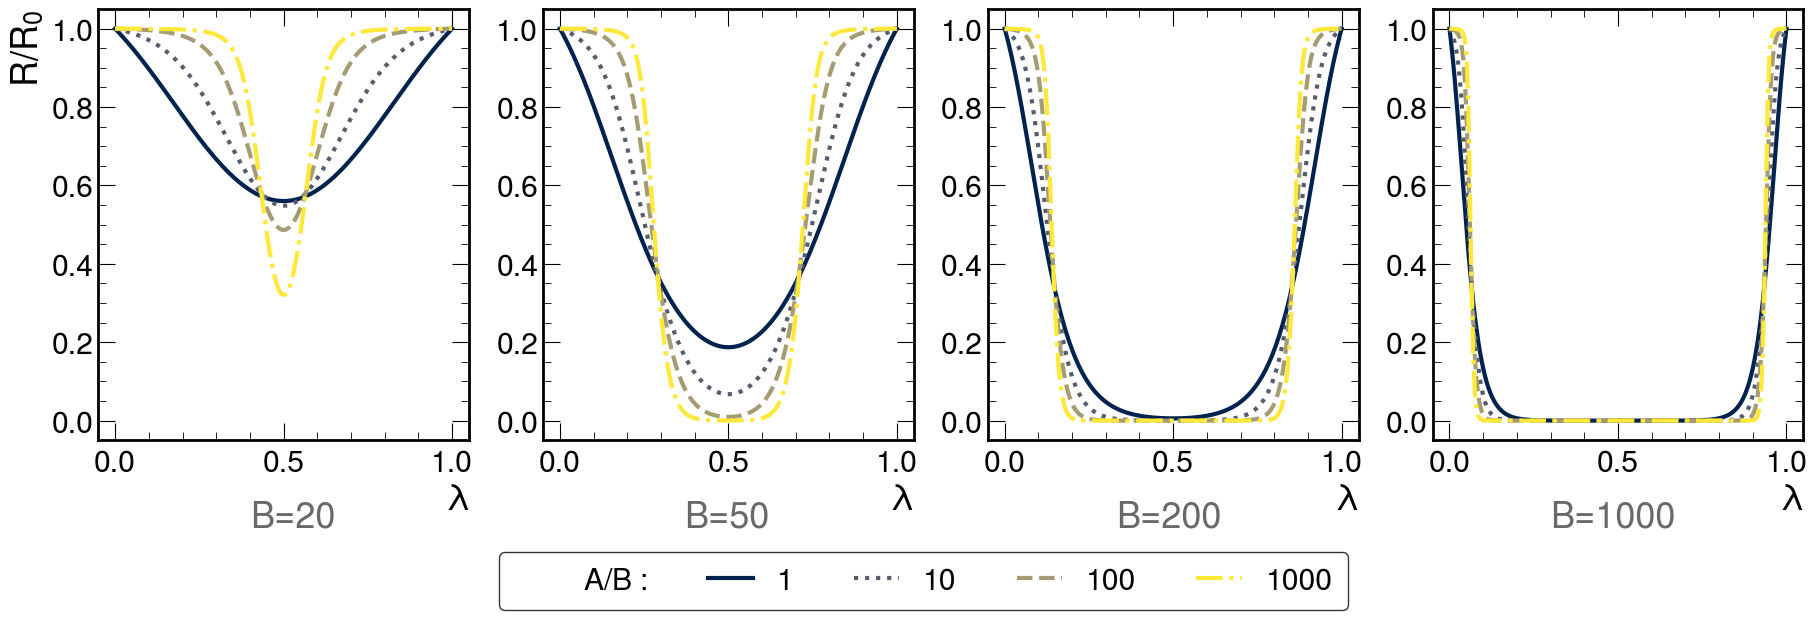

In [10]:
%matplotlib inline

# Scan values
beta = [20, 50, 200, 1000]
alphaOverBeta = [1, 10, 100, 1000]
alpha = [[b * a for a in alphaOverBeta] for b in beta]
beta_x_label = [0.4, 0.37, 0.33, 0.3]
plots = len(alpha) * [0]
linestyles = ["solid", "dotted", "dashed", "dashdot"]

fig, ax = plt.subplots(1, 4, figsize=(22, 7))
for fi, b in enumerate(beta):
    for ix, a in enumerate(alpha[fi]):
        A = a
        B = b
        x = np.linspace(0, 1, 50)
        y_a = np.zeros((2, x.size))
        y_a[0] = 1
        y_a[1] = 0
        asol = solve_bvp(solver, bc, x, y_a)
        x_plot = np.linspace(0, 1, 200)
        y_plot_a = asol.sol(x_plot)[0]
        ydot_plot_a = asol.sol(x_plot)[1]
        rrate = func_rrate(y_plot_a)
        (plots[ix],) = ax[fi].plot(
            x_plot,
            rrate / rrate[0],
            label=f"A={A}",
            linestyle=linestyles[ix],
            lw=3,
        )
    ax[fi].text(beta_x_label[fi], -0.27, f"B={B}", color="dimgrey")
    box = ax[fi].get_position()
    ax[fi].set_position(
        [
            box.x0,
            box.y0 + box.height * 0.2,
            box.width,
            box.height * 0.8,
        ]
    )
    ax[fi].set_xlim([-0.05, 1.05])
    ax[fi].set_ylim([-0.05, 1.05])
    ax[fi].set_xlabel(r"$\lambda$")

ax[0].set_ylabel(r"$R/R_0$")
ph = [plt.plot([], marker="", ls="")[0]]
leg = fig.legend(
    ph + plots,
    [r"$A/B$ :"] + alphaOverBeta,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.0),
    ncols=len(alpha) + 1,
    frameon=True,
)
leg.get_frame().set_edgecolor("black")
fig.savefig("../plots/jaeri_plot2.pdf", bbox_inches="tight")
plt.show()